## Airline Passenger Satisfaction — Data Cleaning & Baseline Logistic Regression

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("data/Airline.csv")

In [40]:
# How does data look
pd.set_option('display.max_columns', None)
df.sample(20)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
94790,1,1,0,57,0,0,673,4,4,4,4,2,5,4,4,4,4,4,4,4,5,25,0.0
67906,0,1,0,12,0,2,1951,1,2,2,2,1,1,1,1,4,4,3,1,4,1,6,6.0
44510,0,1,1,26,0,1,2186,1,5,2,3,1,2,1,1,2,1,5,1,2,1,0,3.0
128734,1,0,0,32,0,0,3688,1,1,1,1,5,5,5,5,5,2,5,2,4,5,28,32.0
109717,1,0,0,60,0,0,2890,4,4,4,4,4,2,2,5,5,4,5,3,5,4,1,0.0
35051,0,1,0,52,1,1,2756,4,4,4,3,2,4,2,2,5,4,4,5,4,2,0,0.0
34136,1,1,0,37,1,1,1529,4,4,2,2,5,2,5,5,5,4,5,4,4,5,0,2.0
78363,0,0,0,48,0,0,366,3,1,1,1,5,3,4,3,3,2,3,2,3,4,0,0.0
42370,0,1,1,34,0,0,1868,1,1,1,3,1,1,1,1,4,1,3,4,3,1,0,0.0
97780,0,1,0,56,0,1,2801,4,5,5,5,4,4,4,4,2,3,4,4,3,4,68,47.0


In [32]:
# Data tyoe of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [33]:
# Missing values
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [34]:
# Duplicated values
df.duplicated().sum()

0

## Missing values row removal 

In [35]:
# Since only 393 values (0.3%) of arrival delays are missing ,we can remove them
df = df.dropna(subset=['Arrival Delay in Minutes'])

In [36]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              129487 no

## Running algorithm without feature selection,feature scaling and removing outliers

### Encoding categorical columns

In [38]:
# Encode the target variable ('satisfaction') to numeric (e.g., 'satisfied' → 1, 'dissatisfied' → 0)
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

# Identify categorical columns to be encoded
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Encode categorical columns using basic label encoding (no preprocessing )
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

In [39]:
# Training algorithm without preprocessing
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y)
X = df.drop(columns=['satisfaction'])  # Use all 21 features
y = df['satisfaction']                # Target variable

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression (without preprocessing): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of Logistic Regression (without preprocessing): 0.8321

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81     11721
           1       0.85      0.85      0.85     14177

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898



C:\Users\sabai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Outliers Detection

In [14]:
# Outlier Detection and Treatment
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include='number'):  # Check only numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outliers[column] = len(outlier_indices)
    return outliers

# Detect outliers in all numeric columns
outlier_counts = detect_outliers_iqr(df)
print("Outlier counts per column:", outlier_counts)

Outlier counts per column: {'satisfaction': 0, 'Gender': 0, 'Customer Type': 23714, 'Age': 0, 'Type of Travel': 0, 'Class': 0, 'Flight Distance': 2575, 'Seat comfort': 0, 'Departure/Arrival time convenient': 0, 'Food and drink': 0, 'Gate location': 0, 'Inflight wifi service': 0, 'Inflight entertainment': 0, 'Online support': 0, 'Ease of Online booking': 0, 'On-board service': 13228, 'Leg room service': 0, 'Baggage handling': 0, 'Checkin service': 15323, 'Cleanliness': 0, 'Online boarding': 0, 'Departure Delay in Minutes': 17970, 'Arrival Delay in Minutes': 17492}


## All the below analysis of data shows that outliers are correct data points and not errors in the data

C:\Users\sabai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


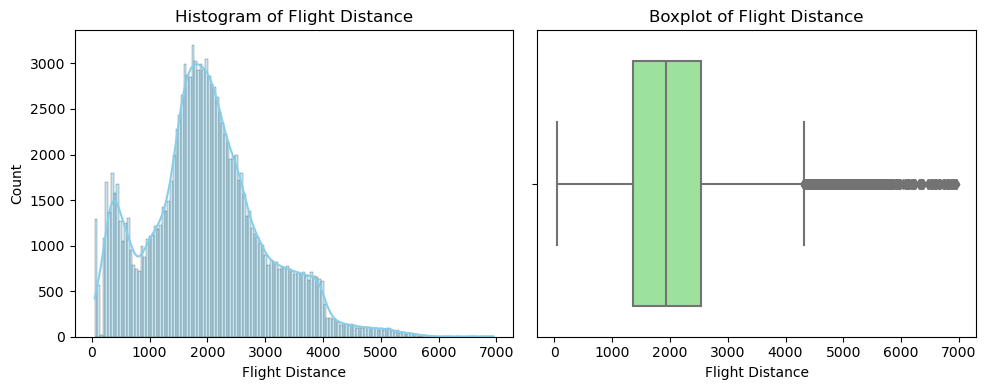

C:\Users\sabai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


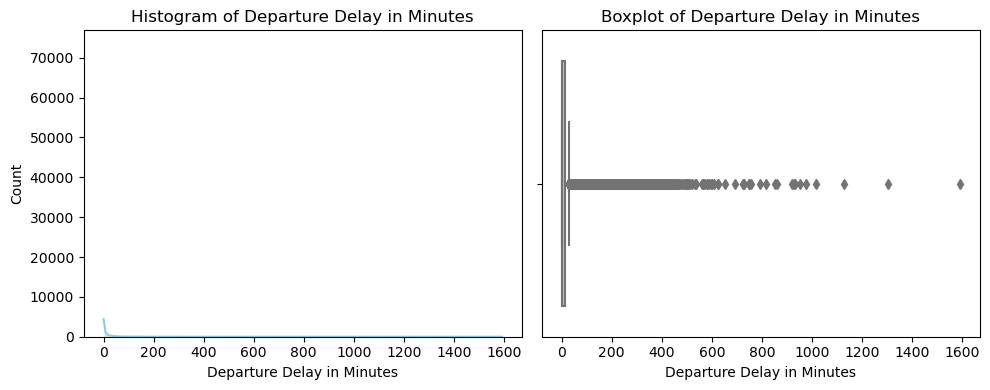

C:\Users\sabai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


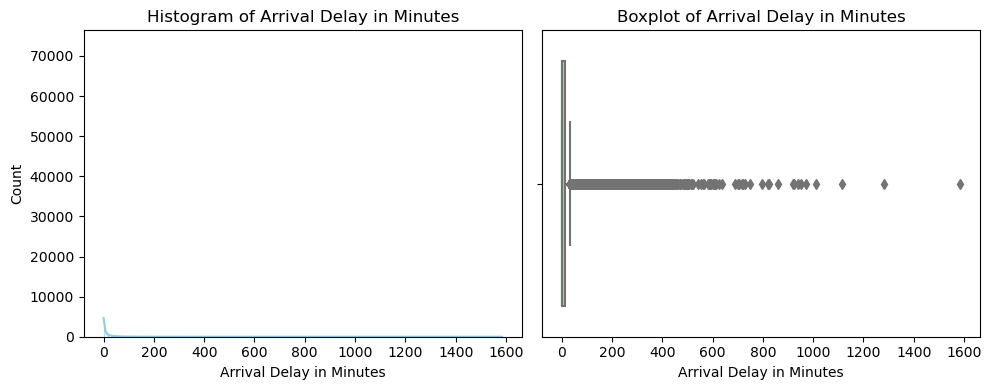

C:\Users\sabai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


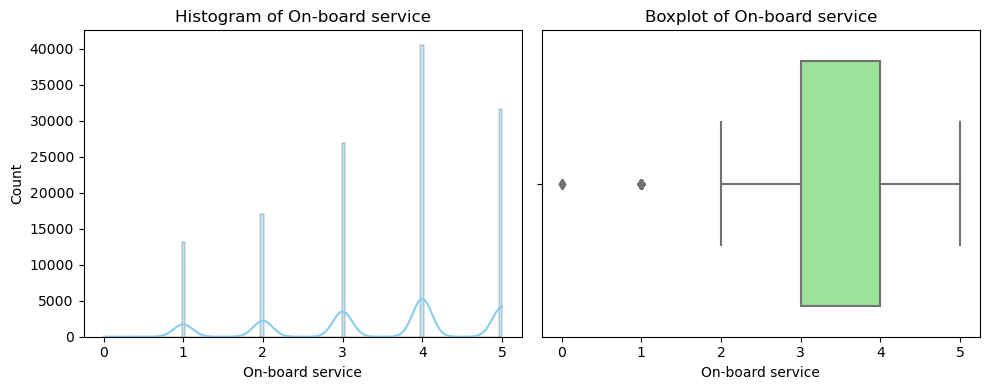

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = [
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'On-board service'
    # Add other columns if they're numeric or already encoded as numbers
]

for col in columns_to_check:
    plt.figure(figsize=(10,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()

# The flight distance outliers represent correct data so they provide valuable inside of data so we keep them
#

In [16]:
print("Min delay:", df['Departure Delay in Minutes'].min())
print("Max delay:", df['Departure Delay in Minutes'].max())


Min delay: 0
Max delay: 1592


In [17]:
long_delays = df[df['Departure Delay in Minutes'] > 900]
print(f"Number of flights delayed more than 15 hours: {len(long_delays)}")
display(long_delays)


Number of flights delayed more than 15 hours: 9


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
3758,0,1,0,30,1,1,3468,1,4,1,...,1,5,3,4,4,1,4,1,978,970.0
9704,0,0,0,47,1,1,3113,2,2,2,...,2,2,4,4,4,2,3,2,1592,1584.0
17110,0,1,0,8,1,1,3017,2,5,2,...,1,4,4,3,5,1,3,1,1128,1115.0
52728,0,1,1,43,0,0,2478,3,3,3,...,5,5,4,5,5,5,3,5,921,924.0
67029,0,0,0,39,0,0,3549,1,4,4,...,1,2,1,3,3,1,1,1,951,940.0
80827,0,0,0,53,0,0,4198,3,4,4,...,3,3,5,2,2,3,4,3,930,952.0
99302,1,1,0,47,0,0,3835,4,5,4,...,4,5,4,5,5,4,4,4,933,920.0
103605,1,1,0,49,0,0,3792,1,1,1,...,4,4,4,4,5,4,4,4,1017,1011.0
122928,1,1,0,32,0,0,4425,2,2,2,...,5,3,4,5,4,5,3,5,1305,1280.0


In [18]:
zero_ratings = df[df['On-board service'] == 0]
print(f"Number of ratings with '0': {len(zero_ratings)}")
display(zero_ratings.head())

Number of ratings with '0': 5


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
69074,0,0,0,53,0,0,1789,2,3,3,...,3,0,0,1,2,3,0,4,0,0.0
69075,0,1,0,43,0,0,4982,2,3,3,...,2,0,0,1,2,2,0,1,3,0.0
69076,0,1,0,50,0,0,4785,2,5,5,...,3,0,0,1,2,4,0,3,0,0.0
69078,0,0,0,49,0,0,3235,2,5,5,...,4,0,0,1,2,2,0,3,0,0.0
69457,0,0,0,66,0,0,5764,3,4,4,...,3,0,0,1,3,3,0,2,0,0.0


## Feature Scaling 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Gender                             129487 non-null  int8   
 2   Customer Type                      129487 non-null  int8   
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  int8   
 5   Class                              129487 non-null  int8   
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              129487 no

In [20]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,1,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,1,63,1,0,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,1,69,1,1,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,1,66,1,1,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


## Scaling all the features between 0 and 1 (min-max scaling)

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Select all features except the target variable 'satisfaction'
features = df.drop(columns=['satisfaction'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features to scale them between 0 and 1
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame with original column names
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target variable back to the DataFrame
scaled_df['satisfaction'] = df['satisfaction'].values

df=scaled_df

# Display the scaled DataFrame
print(scaled_df.head()) 

   Gender  Customer Type       Age  Type of Travel  Class  Flight Distance  \
0     0.0            0.0  0.743590             1.0    0.5         0.031155   
1     1.0            0.0  0.512821             1.0    0.0         0.349804   
2     0.0            0.0  0.102564             1.0    0.5         0.302565   
3     0.0            0.0  0.679487             1.0    0.5         0.083031   
4     0.0            0.0  0.807692             1.0    0.5         0.044052   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0           0.0                                0.0             0.0   
1           0.0                                0.0             0.0   
2           0.0                                0.0             0.0   
3           0.0                                0.0             0.0   
4           0.0                                0.0             0.0   

   Gate location  ...  Ease of Online booking  On-board service  \
0            0.4  ...                     0

In [22]:
# Drop less useful features
X = df.drop(columns=['satisfaction'])

# Target variable
y = df['satisfaction']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8332

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82     11721
           1       0.85      0.85      0.85     14177

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898



## Above steps show that scaling all the features between 0 and 1 increases the performance of model slightly

C:\Users\sabai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sabai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sabai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sabai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

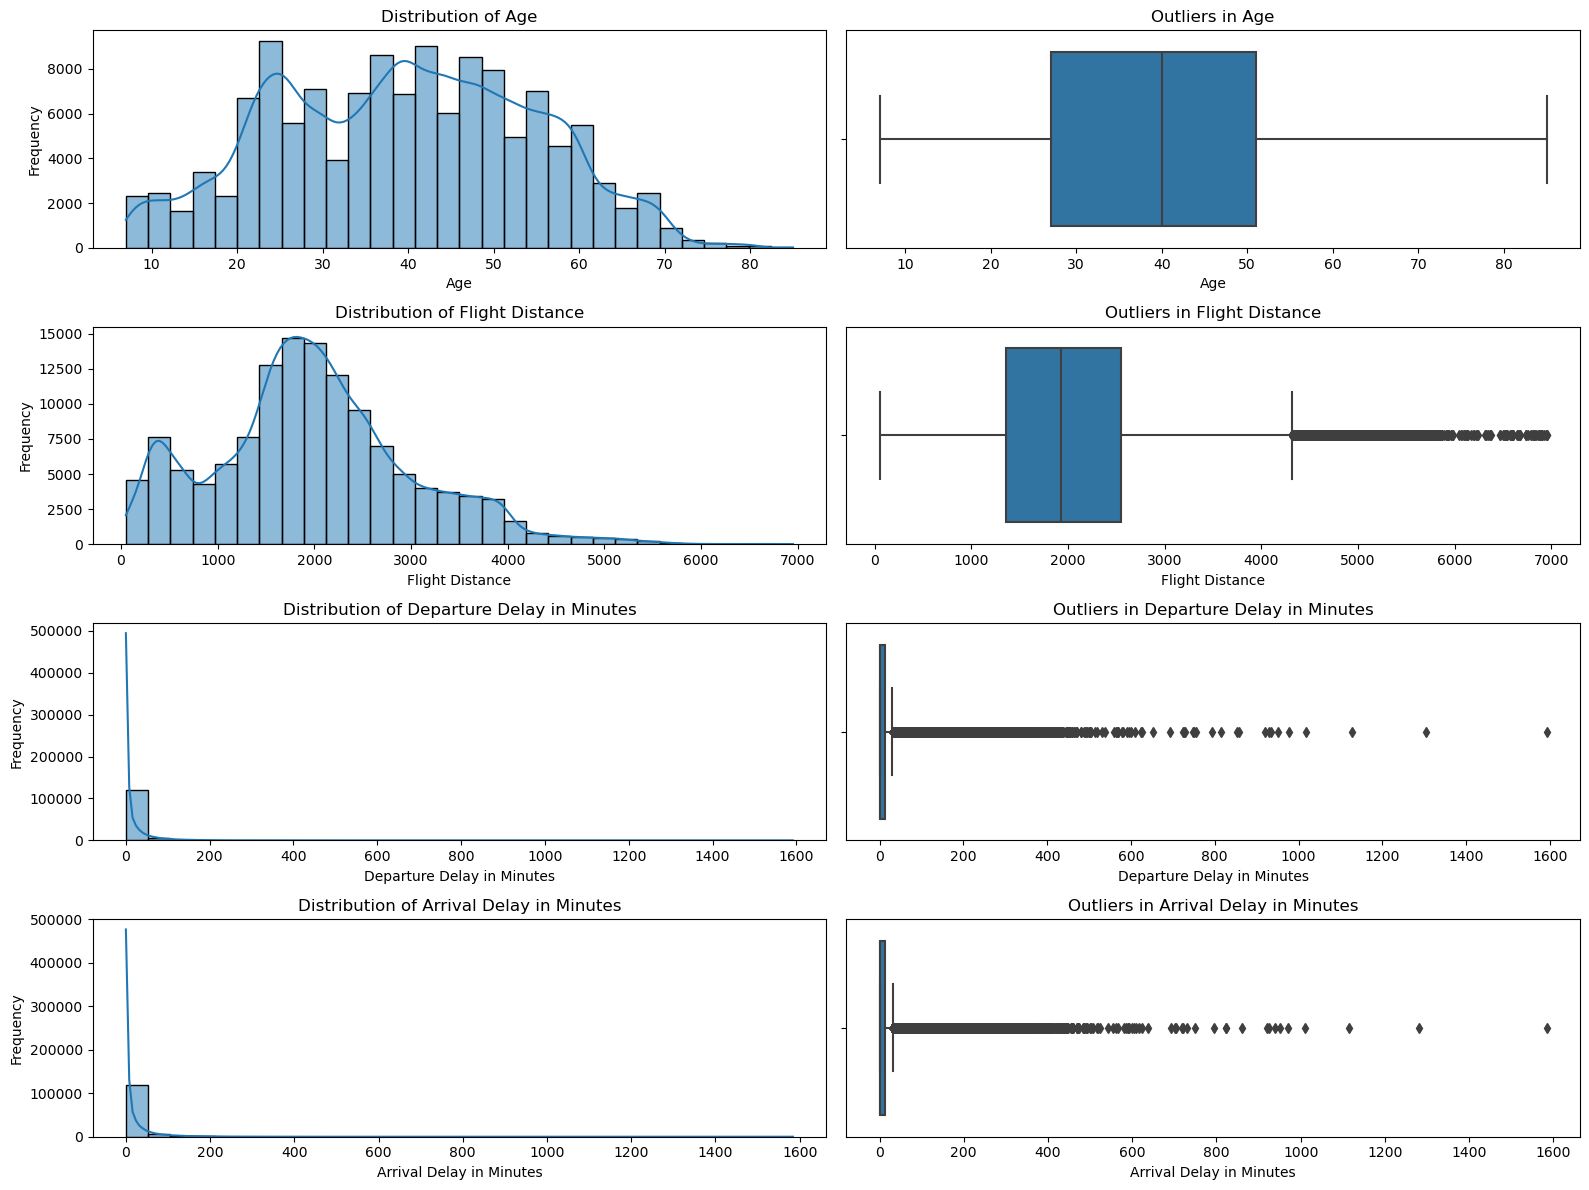

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (uncomment and update the path)
# df = pd.read_csv('your_dataset.csv')

# Columns to analyze
columns_to_check = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Set plot size
plt.figure(figsize=(16, 12))

# Plot histograms (for distribution) and boxplots (for outliers)
for i, column in enumerate(columns_to_check, 1):
    # Histogram with KDE
    plt.subplot(4, 2, 2*i - 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot for outlier detection
    plt.subplot(4, 2, 2*i)
    sns.boxplot(x=df[column])
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()
